In [1]:
# 데이터 확보
import pandas as pd
import numpy as np

In [16]:
lotto = pd.read_excel('./lotto.xlsx',header=2)

In [20]:
df = lotto.iloc[:,-7:-1]
df.head()

,1,2,3,4,5,6
0,14,19,27,28,30,45
1,22,26,29,30,34,45
2,5,17,26,27,35,38
3,21,26,30,32,33,35
4,6,12,31,35,38,43


In [24]:
y_1 = df[1].to_numpy()
y_2 = df[2].to_numpy()
y_3 = df[3].to_numpy()
y_4 = df[4].to_numpy()
y_5 = df[5].to_numpy()
y_6 = df[6].to_numpy()

In [25]:
y_1.shape

(1054,)

In [26]:
from scipy.stats import uniform, randint
int_gen = randint(1,47)
int_gen.rvs()

In [35]:
# 독립변수는 회차로 한다..
x =  np.arange(1,1054)
x = x.reshape(-1,1)
x.shape

(1053, 1)

In [40]:
yy_1 =  y_1[:-1]
yy_2 =  y_2[:-1]
yy_3 =  y_3[:-1]
yy_4 =  y_4[:-1]
yy_5 =  y_5[:-1]
yy_6 =  y_6[:-1]

In [41]:
import matplotlib.pyplot as plt

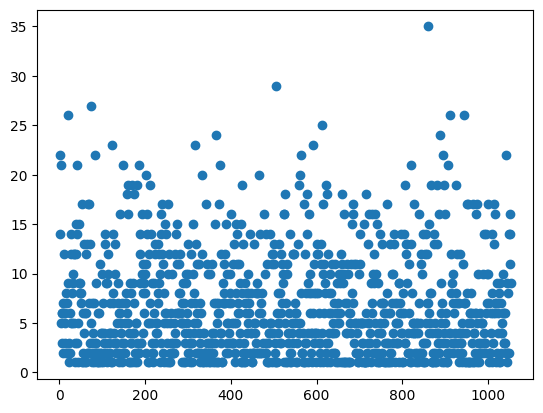

In [46]:
plt.scatter(x,yy_1)
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,yy_1)
np.round(lr.predict([[1054]]))

array([6.])

In [53]:
lr = LinearRegression()
lr.fit(x,yy_2)
np.round(lr.predict([[1054]]))

array([13.])

In [56]:
def lotto_linearRegression(y):
    lr = LinearRegression()
    lr.fit(x,y)
    return np.round(lr.predict([[1054]]))

In [57]:
predict_lott = []
predict_lott.append(lotto_linearRegression(yy_1))
predict_lott.append(lotto_linearRegression(yy_2))
predict_lott.append(lotto_linearRegression(yy_3))
predict_lott.append(lotto_linearRegression(yy_4))
predict_lott.append(lotto_linearRegression(yy_5))
predict_lott.append(lotto_linearRegression(yy_6))
predict_lott

[array([6.]),
 array([13.]),
 array([20.]),
 array([26.]),
 array([33.]),
 array([39.])]

[array([6.]),
 array([13.]),
 array([20.]),
 array([26.]),
 array([33.]),
 array([39.])]

In [131]:
# 각회차별 첫번째 데이터는 랜덥하게 학습용데이터를 만들어서 학습하고..
# 예측도 랜덤하게 넣어주면  예측
from scipy.stats import uniform, randint
int_gen = randint(1,47)
x_1,x_2,x_3,x_4,x_5,x_6 = [],[],[],[],[],[]
for i in range(1053):
    x_1.append( int_gen.rvs() )
    x_2.append( int_gen.rvs() )
    x_3.append( int_gen.rvs() )
    x_4.append( int_gen.rvs() )
    x_5.append( int_gen.rvs() )
    x_6.append( int_gen.rvs() )

In [132]:
x_1 = np.array(x_1).reshape(-1,1)
x_2 = np.array(x_2).reshape(-1,1)
x_3 = np.array(x_3).reshape(-1,1)
x_4 = np.array(x_4).reshape(-1,1)
x_5 = np.array(x_5).reshape(-1,1)
x_6 = np.array(x_6).reshape(-1,1)

In [133]:
def model1(x,y):
    lr = LinearRegression()
    lr.fit(x,y)
    # print(int_gen.rvs())
    return lr.predict([[1]])

In [134]:
print ( np.round(model1(x_1,yy_1)) )
print ( np.round(model1(x_2,yy_2)) )
print ( np.round(model1(x_3,yy_3)) )
print ( np.round(model1(x_4,yy_4)) )
print ( np.round(model1(x_5,yy_5)) )
print ( np.round(model1(x_6,yy_6)) )

[7.]
[13.]
[20.]
[27.]
[33.]
[39.]


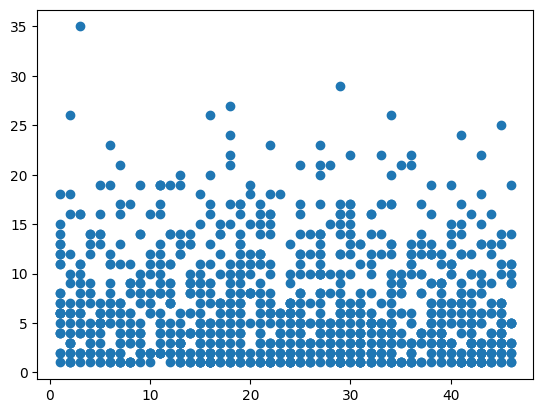

In [135]:
plt.scatter(x_1,yy_1)

In [136]:
# 모델 체인지 : 
from sklearn.neighbors import KNeighborsRegressor

In [138]:
knr = KNeighborsRegressor()

In [191]:
from scipy.stats import uniform, randint
def model2():
    int_gen = randint(1,47)
    x_1,x_2,x_3,x_4,x_5,x_6 = [],[],[],[],[],[]
    for i in range(1053):
        x_1.append( int_gen.rvs() )
        x_2.append( int_gen.rvs() )
        x_3.append( int_gen.rvs() )
        x_4.append( int_gen.rvs() )
        x_5.append( int_gen.rvs() )
        x_6.append( int_gen.rvs() )    
    
    x_1 = np.array(x_1).reshape(-1,1)
    x_2 = np.array(x_2).reshape(-1,1)
    x_3 = np.array(x_3).reshape(-1,1)
    x_4 = np.array(x_4).reshape(-1,1)
    x_5 = np.array(x_5).reshape(-1,1)
    x_6 = np.array(x_6).reshape(-1,1)
    
    x = [x_1,x_2,x_3,x_4,x_5,x_6]
    y = [yy_1,yy_2,yy_3,yy_4,yy_5,yy_6]
    result = []
    for a,b in zip(x,y):
        knr = KNeighborsRegressor(n_neighbors=3)
        knr.fit(a,b)
        # 중복체크
        choice = np.round(knr.predict([[int_gen.rvs()]]))[0]
        while(True):
            if choice not in result:
                result.append(choice)
                break                  
        
    return result

In [192]:
print(model2())

[array([2.]), array([10.]), array([19.]), array([23.]), array([38.]), array([41.])]


In [164]:
df.iloc[-1,:]

1    10
2    23
3    29
4    33
5    37
6    40
Name: 1053, dtype: int64

In [193]:
from sklearn.linear_model import SGDRegressor

In [194]:
sgdr = SGDRegressor()
sgdr.fit(x_1,yy_1)

SGDRegressor()

In [195]:
sgdr.predict([[int_gen.rvs()]])

array([7.50723701])

In [208]:
from scipy.stats import uniform, randint
def model3():
    int_gen = randint(1,47)
    x_1,x_2,x_3,x_4,x_5,x_6 = [],[],[],[],[],[]
    for i in range(1053):
        x_1.append( int_gen.rvs() )
        x_2.append( int_gen.rvs() )
        x_3.append( int_gen.rvs() )
        x_4.append( int_gen.rvs() )
        x_5.append( int_gen.rvs() )
        x_6.append( int_gen.rvs() )    
    
    x_1 = np.array(x_1).reshape(-1,1)
    x_2 = np.array(x_2).reshape(-1,1)
    x_3 = np.array(x_3).reshape(-1,1)
    x_4 = np.array(x_4).reshape(-1,1)
    x_5 = np.array(x_5).reshape(-1,1)
    x_6 = np.array(x_6).reshape(-1,1)
    
    x = [x_1,x_2,x_3,x_4,x_5,x_6]
    y = [yy_1,yy_2,yy_3,yy_4,yy_5,yy_6]
    result = []
    for a,b in zip(x,y):
        sgdr = SGDRegressor()
        sgdr.fit(a,b)
        # 중복체크
        choice = np.round(sgdr.predict([[int_gen.rvs()]]))[0]
        while(True):
            if choice not in result:
                result.append(choice)
                break        
    return result

In [209]:
print(model2())
print(model3())

[array([7.]), array([19.]), array([23.]), array([27.]), array([34.]), array([44.])]
[5.0, 11.0, 20.0, 26.0, 36.0, 40.0]


In [202]:
temp = [10,11,12,13]
choice = 11
# 1. temp에 choice 변수의 값을 append할때 이미 있으면 choice 변수의 값을 변경해서 넣어준다
# 2. set 함수를 이용해서 총 길이가 5개가 되도록 순환문을 돌린다. 

In [211]:
len(set(temp))

4